In [72]:
import nltk
from nltk import *
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
import csv
import pickle
import pandas as pd
from nltk.classify import NaiveBayesClassifier
import matplotlib.pyplot as plt

In [50]:
def remove_punctuation(word):
    no_punct = ""
    for char in word:
        if char not in string.punctuation:
            no_punct = no_punct + char
    if no_punct.isnumeric() and no_punct == '\'':
        return ''
    return no_punct

In [45]:
ps = PorterStemmer()
def stem_the_word(word):
    word.encode('utf-8')
    return ps.stem(word)

In [40]:
stop_words = stopwords.words('english')

In [5]:
def word_features(text):
    return dict([(stem_the_word(remove_punctuation(word.lower())), True) for word in word_tokenize(text) if remove_punctuation(word.lower()) not in stop_words and remove_punctuation(word.lower()) != ''])

    

In [6]:
word_features("I am a .. good hello")

{'good': True, 'hello': True}

In [9]:
# reading data from reviews.txt
with open("Reviews.txt") as file:
    data = file.readlines()

print(data)
#print(tokenized_training_data)
#filtered_training_data = filter_words(tokenized_training_data)
#print(filtered_training_data)


["1,I don't use Facebook Messenger often but when I do it is always reliable.\n", "0,The phone feature don't work as it should, sometimes the app will freeze.\n", '0,It is kind of a pest, like being interrupted when doing something else...\n', '0,too envasive on my privacy and things it can to do my computer and phone.\n', '1,I want to say thanks for your help to Heather and Geronimo wonderful help\n', '1,Easy to use. I like the notification when receiving a FB Messenger call.\n', "0,If I could I'd give it zero stars it force closes when u wanna video chat\n", '0,It is a great app, but it is a little slow, coming up on the Kindle Fire.\n', '1,The FB messenger allows me to avoid work and keep in contact with friends\n', '0,Do not like the fact I have to have the messenger app just to chat on FB.\n', '1,Luv it. So much easier than texting\n', '1,Love it! Great way to stay in touch\n', '1,This is fast and accurate. Love it.\n', '1,Bosch, great season by your company\n', '1,Great and eaizi

In [11]:
training_set = []
for line in data:
    sentiment = line.strip().split(',')[0]
    text = str(line.strip().split(',')[1:])
    feature = word_features(text)
    training_set.append((feature,sentiment))
print(training_set[0])

({'nt': True, 'use': True, 'facebook': True, 'messeng': True, 'often': True, 'alway': True, 'reliabl': True}, '1')


In [13]:
classifier = NaiveBayesClassifier.train(training_set)

In [21]:
print(classifier.classify(word_features('I hate everything')))

0


In [24]:
print(classifier.classify(word_features('very good')))

1


In [31]:
print(classifier.classify(word_features('best')))

1


In [26]:
print(classifier.classify(word_features('hate')))

0


## Predicting Sentiment for Tweets on LGBT

In [ ]:
#Loading the data
#with open('./TwitterTweets/test.csv') as file:
#    india_tweets = 

In [41]:
india_df = pd.read_csv('./TwitterTweets/test.csv')
india_df.head()

,created_at,text
0,2018-05-08 19:32:35,RT @unwomenasia: You have the right to define ...
1,2018-05-08 19:31:56,I’m still looking for LGBT movie/short film wh...
2,2018-05-08 19:25:35,RT @avimHarZ: Just finished this! Jane and Tal...
3,2018-05-08 19:23:24,RT @avimHarZ: Just finished this! Jane and Tal...
4,2018-05-08 19:21:41,RT @cuntmina: this is the loudest thing she's ...


In [52]:
india_df['features'] = india_df.text.map(word_features)

In [53]:
india_df['Sentiment'] = india_df.features.map(classifier.classify)

In [77]:
n_tweets = len(india_df[india_df.Sentiment == '0'])

In [78]:
p_tweets = len(india_df[india_df.Sentiment == '1'])

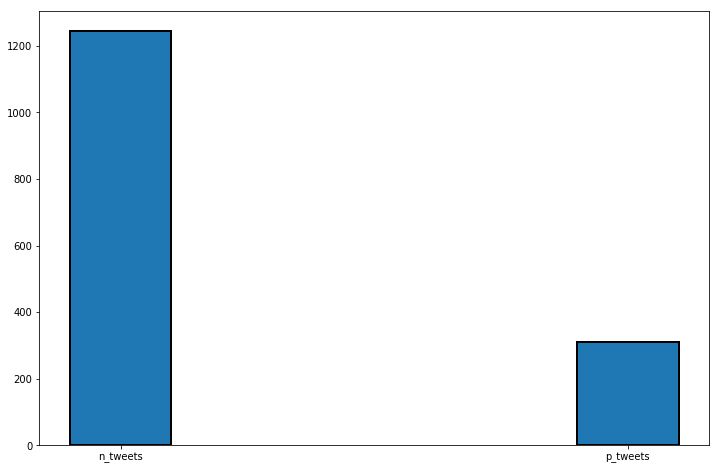

In [79]:
plt.figure(figsize=(12, 8))
plt.bar(['n_tweets', 'p_tweets'], [n_tweets, p_tweets] , width=0.2, align = 'center' , ec=['k','k'] , linewidth = 2)
plt.show()